# Case study 1: Clothing images classification

The objective of this case study is to show how to implement a basic convolutional neural network (CNN) and 
how to train this neural network model to classify images of clothing, like sneakers and shirts.

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

![title](fashion-mnist-sprite.png)

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as 
the "Hello, World" of machine learning programs for computer vision. 
The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that 
of the articles of clothing you'll use here.

Classifying Fashion MNIST clothing images is a bit more challenging than classifying
digits of the regular MNIST database. Both datasets are relatively small and are used to verify that an algorithm works as expected. 

60,000 images are used to train the network and 10,000 images to evaluate 
how accurately the neural network learned to classify images. 

In [7]:
#Import and load the Fashion MNIST data directly from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, 
ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [8]:
# Display all the possible values taken by labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Each training and test example is assigned to one of the following labels:

0 T-shirt/top||
1 Trouser||
2 Pullover||
3 Dress||
4 Coat||
5 Sandal||
6 Shirt||
7 Sneaker||
8 Bag||
9 Ankle boot

In [9]:
# Define the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the format of the dataset before training the model. 
The following shows there are 60,000 images in the training set,
with each image represented as 28 x 28 pixels:

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

## Data preprocessing

The data must be preprocessed before training the network. 

In [14]:
# Look at the range of pixel values for the first image of the training set
print(np.min(train_images[0,:,:]))
print(np.max(train_images[0,:,:]))

0
255


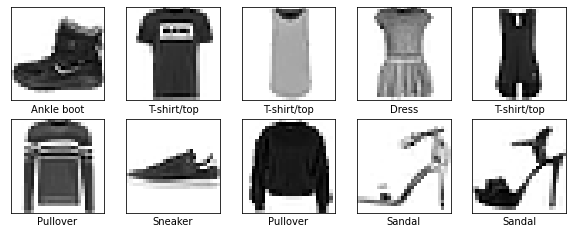

In [15]:
# Plot the first 10 images from the training set and their corresponding class
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

We rescale these values to a range of 0 to 1 before feeding them to the neural network model
It's important to preprocess the training and testing sets in the same way.

In [16]:
# Features rescaling
# Why?
# To ensure that the gradient descent moves smoothly 
# towards the minima and that the steps for gradient descent 
# are updated at the same rate for all the features 
# before feeding the data to the model
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build neural network model

In [17]:
# Set up the ANN layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# transforms the format of the images 
# from a two-dimensional array (of 28 by 28 pixels) 
# to a one-dimensional array (of 28 * 28 = 784 pixels). 
# Think of this layer as unstacking rows of pixels in the image and lining them up. 
# This layer has no parameters to learn; it only reformats the data.
model.add(Flatten(input_shape=(28, 28)))
# Fully connected, neural layer with 128 neurons 
model.add(Dense(128, activation='relu'))
# Fully connected, neural layer with 10 neurons (one per class)
model.add(Dense(10, activation='softmax'))

In [18]:
# Overview of the model with the number of parameters to train
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Configuration of the model with the optimizer, loss and metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4940 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3351 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3121 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2799 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2678 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy for the 2-layer ANN:', test_acc)

313/313 - 1s - loss: 0.3252 - accuracy: 0.8833 - 600ms/epoch - 2ms/step

Test accuracy for the 2-layer ANN: 0.8833000063896179


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
model2 = Sequential([
         Conv2D(16, kernel_size=(3, 3), activation='relu',strides=1, padding='same', input_shape=(28, 28, 1)),
         MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
         Flatten(),
         Dense(16, activation='relu'),
         Dense(10, activation='softmax')
                    ])

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                50192     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 50,522
Trainable params: 50,522
Non-trainable params: 0
__________________________________________________

In [24]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6043 - accuracy: 0.7767
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3628 - accuracy: 0.8722
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3108 - accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2824 - accuracy: 0.8998
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2636 - accuracy: 0.9065
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2490 - accuracy: 0.9111
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2364 - accuracy: 0.9158
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2263 - accuracy: 0.9179
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2132 - accuracy: 0.9234
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/ste

In [26]:
test2_loss, test2_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy for the CNN:', test2_acc)

313/313 - 2s - loss: 0.3128 - accuracy: 0.8915 - 2s/epoch - 7ms/step

Test accuracy for the CNN: 0.8914999961853027
